# Perona-Malik 算法实现

# 导入必要库

In [50]:

import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
np.set_printoptions(suppress=True, threshold=np.nan)

# 读取原始图像

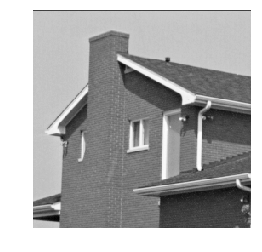

In [51]:
img_src = cv2.imread('.\\data\\4.1.05.tiff')
img_src = cv2.cvtColor(img_src,cv2.COLOR_BGR2GRAY)

img = np.zeros(img_src.shape)
img[:,:] = img_src
plt.imshow(img,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()

#print(img)

# 将图像加噪点以及高斯模糊，作为要处理的图像

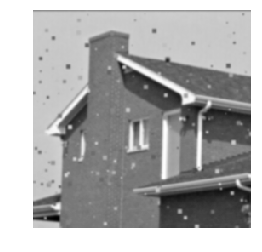

In [52]:
for i in range(200):
    x = np.random.randint(0,img.shape[0])
    y = np.random.randint(0,img.shape[1])
    step = np.random.randint(0,5)
    cv2.rectangle(img, (x, y), (x+step,y+step), np.random.randint(100,200),-1) #12

img = cv2.GaussianBlur(img,(5,5),1)

plt.imshow(img,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()

# 利用差分计算梯度

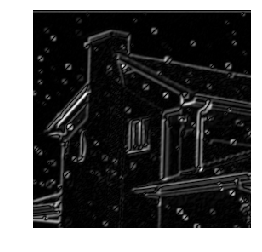

In [53]:
fil_lpls = np.array([[0,   1/2,   0],
                     [1/2, 0,  -1/2],
                     [0,  -1/2,   0]])
lpls_img = cv2.filter2D(img,-1,fil_lpls) 
plt.imshow(np.abs(lpls_img),cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()

#print(lpls_img)

#  计算扩散函数

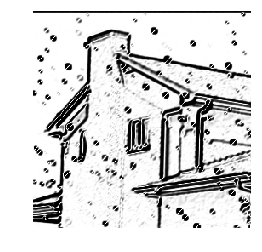

In [54]:
K = 10
g1 = np.exp(- np.power(lpls_img/K,2))

plt.imshow(g1,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()


#print(g1)

# 对图像上下左右各补一个像素的边框，以便进行后续操作（等同于np.pad）

In [55]:
img_padding = np.zeros((img.shape[0]+2,img.shape[1]+2))
c_temp = np.zeros((img.shape[0]+2,img.shape[1]+2))
dst_temp =   np.zeros((img.shape[0]+2,img.shape[1]+2))
img_padding[1:img_padding.shape[0]-1,1:img_padding.shape[1]-1] = img
c_temp[1:img_padding.shape[0]-1,1:img_padding.shape[1]-1] = g1


# 进行计算

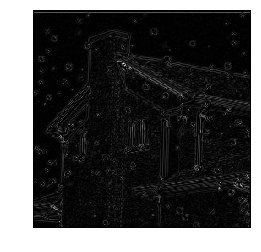

16.62289810182237


In [56]:
for i in range(1,img_padding.shape[0]-1):
    for j in range(1,img_padding.shape[1]-1):
        north = c_temp[i-1,j]*(img_padding[i-1,j] - img_padding[i,j])/2
        east  = c_temp[i,j-1]*(img_padding[i,j-1] - img_padding[i,j])/2
        south = c_temp[i+1,j]*(img_padding[i+1,j] - img_padding[i,j])/2
        west  = c_temp[i,j+1]*(img_padding[i,j+1] - img_padding[i,j])/2
        dst_temp[i,j] = north + east + south + west

plt.imshow(np.abs(dst_temp),cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()  


print(np.max(dst_temp))

# 显示原图像与处理后图像

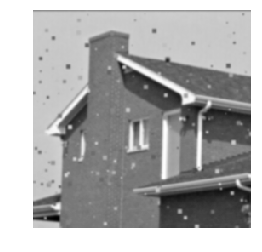

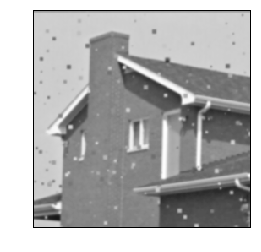

In [57]:


plt.imshow(img,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()

#print(dst_temp)

t = 0.25

dst = img_padding + dst_temp * t

plt.imshow(dst,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()


# 将上述所有操作封装成函数，以便进行迭代

In [58]:
def PMiteration(img,K = 3,t = 0.25):
    fil_lpls = np.array([[0,   1/2,   0],
                     [1/2, 0,  -1/2],
                     [0,  -1/2,   0]])
    lpls_img = cv2.filter2D(img,-1,fil_lpls) 

    K = 30
    g1 = np.exp(- np.power(lpls_img/K,2))

    img_padding = np.zeros((img.shape[0]+2,img.shape[1]+2))
    c_temp = np.zeros((img.shape[0]+2,img.shape[1]+2))
    dst_temp =   np.zeros((img.shape[0]+2,img.shape[1]+2))
    img_padding[1:img_padding.shape[0]-1,1:img_padding.shape[1]-1] = img
    c_temp[1:img_padding.shape[0]-1,1:img_padding.shape[1]-1] = g1
    
    for i in range(1,img_padding.shape[0]-1):
        for j in range(1,img_padding.shape[1]-1):
            north = c_temp[i-1,j]*(img_padding[i-1,j] - img_padding[i,j])/2
            east  = c_temp[i,j-1]*(img_padding[i,j-1] - img_padding[i,j])/2
            south = c_temp[i+1,j]*(img_padding[i+1,j] - img_padding[i,j])/2
            west  = c_temp[i,j+1]*(img_padding[i,j+1] - img_padding[i,j])/2
            dst_temp[i,j] = north + east + south + west

    return  (img_padding + dst_temp * 0.25)[1:img_padding.shape[0]-1,1:img_padding.shape[1]-1]

# 进行迭代，可以看到，图像的边缘得到了保留，而噪声得到了抑制

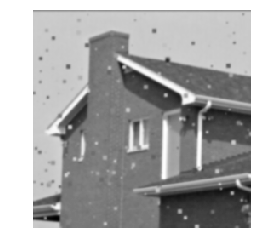

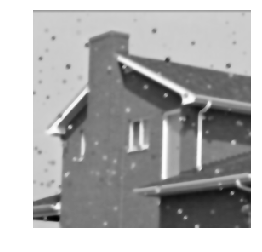

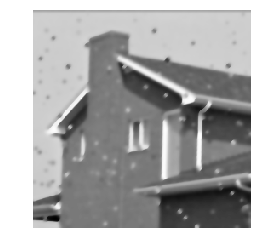

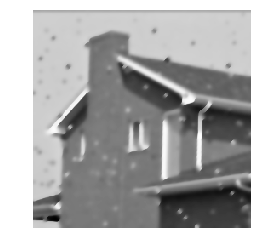

In [59]:
for i in range(20):
    img = PMiteration(img,t = 2)
    if not i%5:
        plt.imshow(img,cmap = "gray")
        plt.axis("off")#去除坐标轴
        plt.show()